# Clustering of the N2 dataset

The N2 dataset shows one cluster, when it has two classes and should show two clusters.

In [1]:
import pandas
from sklearn.model_selection import train_test_split

Get the input file path from the calf project

In [2]:
input_file_path = "~/PycharmProjects/calf/data/input/N2.csv"

Read the input file into a DataFrame

In [3]:
df = pandas.read_csv(input_file_path, header=0, sep=",")
df.head()

,ctrl/case,ADIPOQ,SERPINA3,AMBP,A2M,ACE,AGT,APOA1,APOA2,APOA4,...,CALCA,IL6,LTA,CSF3,PGF,GCG_0001,IL1B,TGFB3,FGF2,MDA-LDL
0,0,1.1538,-1.008,0.4650,-0.6181,-0.9350,1.7169,0.974,1.7821,-0.2580,...,-0.3688,0.8739,-0.2390,2.8335,0.4469,0.101,0.1688,-0.1861,1.9591,-0.0720
1,0,-0.7661,-1.039,1.2479,0.2220,-0.7140,2.6709,-0.275,0.1680,0.9759,...,-0.3688,1.5408,3.5482,-0.6669,-0.7770,1.015,0.1688,0.2689,-0.3498,-0.5491
2,0,-0.2721,-0.766,-0.7480,-1.0371,0.0459,-0.2940,0.046,0.9320,-0.5050,...,0.2562,0.2060,-0.8099,-0.6669,-0.7770,0.372,-0.5152,-0.1861,-0.3498,-0.5491
3,0,-0.8201,-1.281,0.4650,-0.1980,0.8059,0.8980,-0.954,-0.4270,-0.5050,...,-0.3688,-0.5718,-0.8099,-0.6669,-0.5050,-0.543,0.1688,0.2689,-0.5978,-0.5491
4,0,0.0019,-1.188,-0.7090,0.6421,0.2039,-0.3500,-0.275,0.5070,0.2349,...,0.0612,1.8737,1.0388,-0.6669,0.4469,0.575,-0.2332,-0.4131,0.4472,-0.5491


Remove the outcome column to get the independent variables

In [4]:
X = df.loc[:, df.columns != 'ctrl/case']
X.head()

,ADIPOQ,SERPINA3,AMBP,A2M,ACE,AGT,APOA1,APOA2,APOA4,APOH,...,CALCA,IL6,LTA,CSF3,PGF,GCG_0001,IL1B,TGFB3,FGF2,MDA-LDL
0,1.1538,-1.008,0.4650,-0.6181,-0.9350,1.7169,0.974,1.7821,-0.2580,2.6529,...,-0.3688,0.8739,-0.2390,2.8335,0.4469,0.101,0.1688,-0.1861,1.9591,-0.0720
1,-0.7661,-1.039,1.2479,0.2220,-0.7140,2.6709,-0.275,0.1680,0.9759,0.4610,...,-0.3688,1.5408,3.5482,-0.6669,-0.7770,1.015,0.1688,0.2689,-0.3498,-0.5491
2,-0.2721,-0.766,-0.7480,-1.0371,0.0459,-0.2940,0.046,0.9320,-0.5050,-0.0990,...,0.2562,0.2060,-0.8099,-0.6669,-0.7770,0.372,-0.5152,-0.1861,-0.3498,-0.5491
3,-0.8201,-1.281,0.4650,-0.1980,0.8059,0.8980,-0.954,-0.4270,-0.5050,1.3320,...,-0.3688,-0.5718,-0.8099,-0.6669,-0.5050,-0.543,0.1688,0.2689,-0.5978,-0.5491
4,0.0019,-1.188,-0.7090,0.6421,0.2039,-0.3500,-0.275,0.5070,0.2349,-0.6120,...,0.0612,1.8737,1.0388,-0.6669,0.4469,0.575,-0.2332,-0.4131,0.4472,-0.5491


The system is underdetermined, that is, more variables than data points

In [5]:
# computing number of rows
rows = len(X.axes[0])

# computing number of columns
cols = len(X.axes[1])

print("Number of Rows (data points): ", rows)
print("Number of Columns (features or variables): ", cols)

Number of Rows (data points):  72
Number of Columns (features or variables):  135


In [6]:
Y = df['ctrl/case']

Y represents whether the individuals became psychotic (1) or not (0).  Y is a Pandas series.

In [7]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: ctrl/case, dtype: int64

In [8]:
Y.describe()

count    72.000000
mean      0.444444
std       0.500391
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000
Name: ctrl/case, dtype: float64

The individuals who did not progress to psychosis are labeled non_psychotic.

In [9]:
non_psychotic = Y[Y == 0]
non_psychotic.head()

0    0
1    0
2    0
3    0
4    0
Name: ctrl/case, dtype: int64

The individuals who progressed to psychosis are labeled pre_psychotic.

In [10]:
pre_psychotic = Y[Y == 1]

In [11]:
pre_psychotic.head()

40    1
41    1
42    1
43    1
44    1
Name: ctrl/case, dtype: int64

In [12]:
Y_names = Y.replace({0: 'non_psychotic', 1: 'pre_psychotic'})
Y_names

0     non_psychotic
1     non_psychotic
2     non_psychotic
3     non_psychotic
4     non_psychotic
          ...      
67    pre_psychotic
68    pre_psychotic
69    pre_psychotic
70    pre_psychotic
71    pre_psychotic
Name: ctrl/case, Length: 72, dtype: object

## Predict using support vector classification


Set the value of gamma manually.  To find good values for these parameters, we can use tools such as grid search and cross validation.
clf stands for classifier.

# Nearest Neighbors Classification
https://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html

KNN (k nearest neighbors) classification

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_names, test_size=0.1, random_state=42)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [15]:
print(y_pred)

['pre_psychotic' 'non_psychotic' 'pre_psychotic' 'non_psychotic'
 'non_psychotic' 'pre_psychotic' 'pre_psychotic' 'pre_psychotic']


Align the diagnoses and predictions

In [16]:
df_r = pandas.concat([y_test, pandas.DataFrame(y_pred, columns=['predicted'], index=y_test.index)], axis=1)
print(df_r)

        ctrl/case      predicted
4   non_psychotic  pre_psychotic
62  pre_psychotic  non_psychotic
18  non_psychotic  pre_psychotic
0   non_psychotic  non_psychotic
28  non_psychotic  non_psychotic
50  pre_psychotic  pre_psychotic
10  non_psychotic  pre_psychotic
34  non_psychotic  pre_psychotic


## The confusion matrix

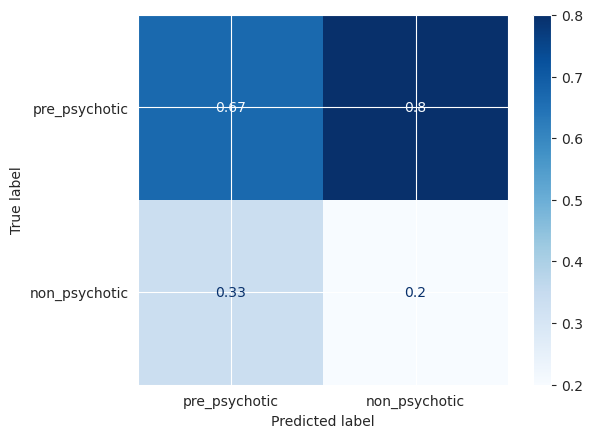

In [17]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, normalize='pred')

cm_display = ConfusionMatrixDisplay(cm, display_labels=set(Y_names))

# Blue is easier to understand.  Color maps can be found here:
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
cm_display.plot(cmap=plt.cm.Blues)

## The ROC and Precision Recall Curves

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py

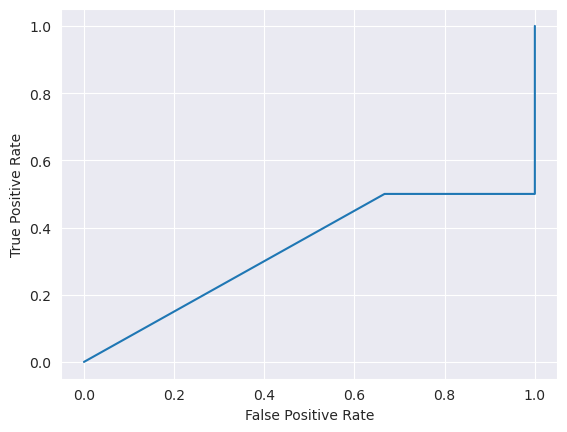

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = clf.predict_proba(X_test)

# y_score needs to be probabilities, see:
# https://stackoverflow.com/questions/52910061
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

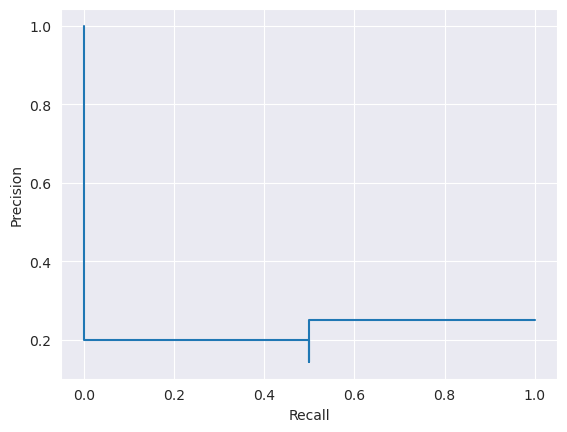

In [19]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score[:, 1], pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

## Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score

"AUC is an effective way to summarize the overall diagnostic accuracy of the test. It takes values from 0 to 1, where a value of 0 indicates a perfectly inaccurate test and a value of 1 reflects a perfectly accurate test. AUC can be computed using the trapezoidal rule.3 In general, an AUC of 0.5 suggests no discrimination (i.e., ability to diagnose patients with and without the disease or condition based on the test), 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding"

https://www.sciencedirect.com/science/article/pii/S1556086415306043#:~:text=tests%20differently.4-,AREA%20UNDER%20THE%20ROC%20CURVE,-AUC%20is%20an

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_score[:, 1])

0.33333333333333337

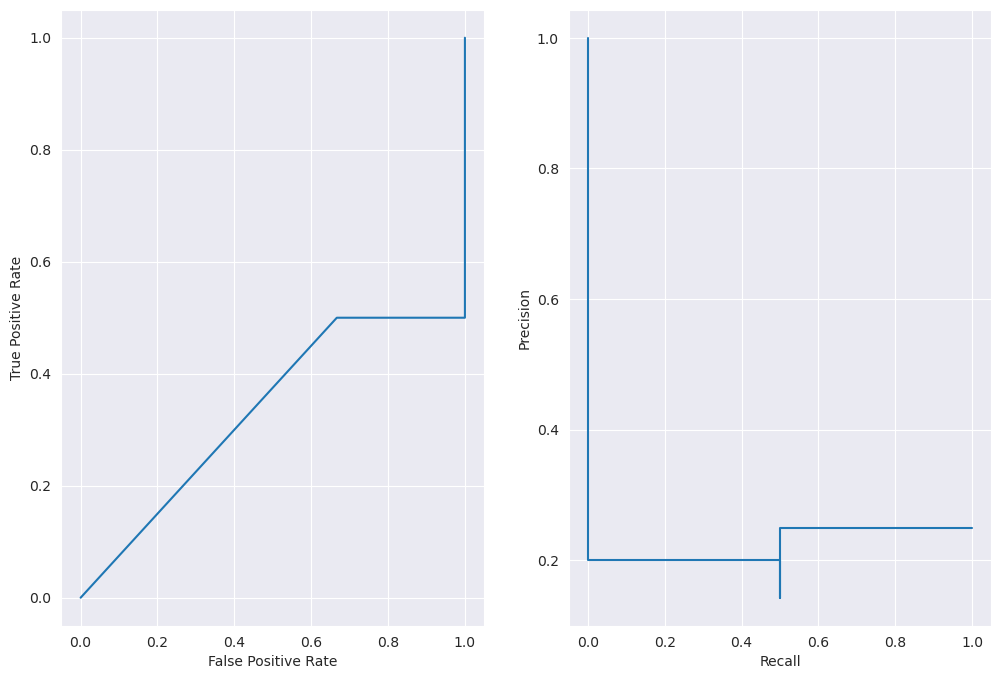

In [21]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

## Find the best KNN classification model based on a parameter grid and the rand metric

Four clusters is best according to KNN.  We expect 2 clusters.

In [22]:
from sklearn import neighbors
from sklearn.model_selection import ParameterGrid
from pprint import pprint
from sklearn import metrics

param_dict = {'n_neighbors': range(2, 20, 1), 'weights': ["uniform", "distance"]}
param_grid = list(ParameterGrid(param_dict))
# pprint(param_grid)

score = []
for p in param_grid:
    clf = neighbors.KNeighborsClassifier(n_neighbors=p['n_neighbors'], weights=p['weights'])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_score = metrics.adjusted_rand_score(y_test, y_pred)
    score.append([y_score, p])

sorted_score = sorted(score, key=lambda x: x[0], reverse=True)
pprint(sorted_score[0])

[0.46153846153846156, {'n_neighbors': 4, 'weights': 'uniform'}]


|## Here we show a different classification based on the two dominant columns from example 1

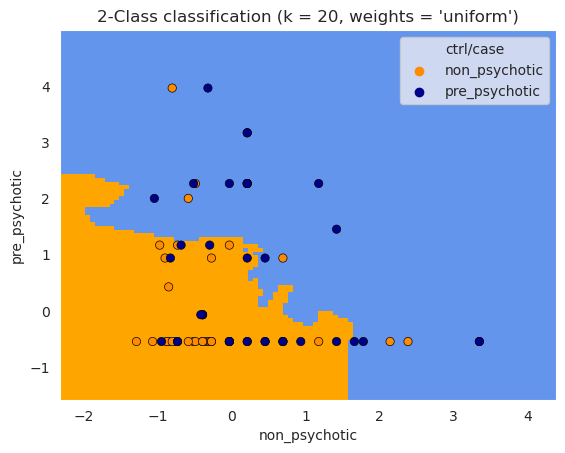

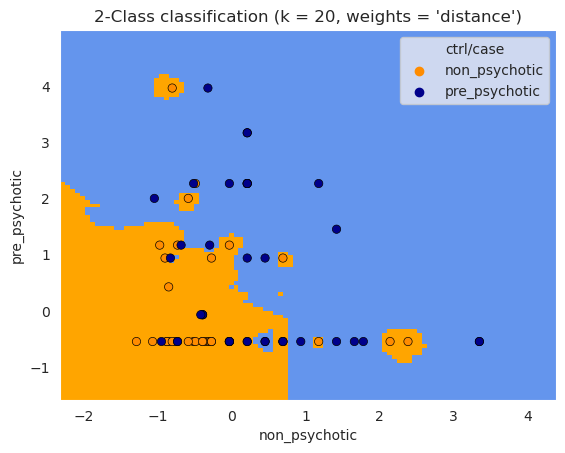

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 20

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X_p = X[['MMP7', 'MDA-LDL']]
y_p = Y_names

# Create color maps
cmap_light = ListedColormap(["orange", "cornflowerblue"])
cmap_bold = ["darkorange", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_p, y_p)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X_p,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel="non_psychotic",
        ylabel="pre_psychotic",
        shading="auto"
    )

    # Plot also the training points
    sns.scatterplot(
        x=X_p[X_p.columns[0]],
        y=X_p[X_p.columns[1]],
        hue=Y_names,
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "2-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

## Cluster analysis

Clustering is an unsupervised method that may help reveal the number of true classes in the psych data.
There is only one cluster observed.  We should get at least two clusters.

In [24]:
from nltk.metrics.distance import edit_distance
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import OPTICS
from sklearn import metrics

# Standardize the feature matrix
X_s = StandardScaler().fit_transform(X.to_numpy())

# Get the ground truth labels
labels_true = Y.values.tolist()
clust = OPTICS(min_samples=10, min_cluster_size=0.2)

# Run the fit and get the labels
clust.fit(X)
labels = clust.labels_

df_label = pd.DataFrame(zip(labels_true, labels), columns=['Truth', 'Observed'])
print(df_label)

# 37, or about half are different
print('Label edit distance ', edit_distance(labels, labels_true))

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
# print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

    Truth  Observed
0       0         0
1       0         0
2       0         0
3       0         0
4       0         0
..    ...       ...
67      1         0
68      1         0
69      1         0
70      1         0
71      1         0

[72 rows x 2 columns]
Label edit distance  32
Estimated number of clusters: 1
Estimated number of noise points: 0
Homogeneity: 0.000
Completeness: 1.000
V-measure: 0.000
Adjusted Rand Index: 0.000
Adjusted Mutual Information: 0.000


## Visualize the results on PCA-reduced data

"PCA allows to project the data from the original [135]-dimensional space into a lower dimensional space. Subsequently, we can use PCA to project into a 2-dimensional space and plot the data and the clusters in this new space."  https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

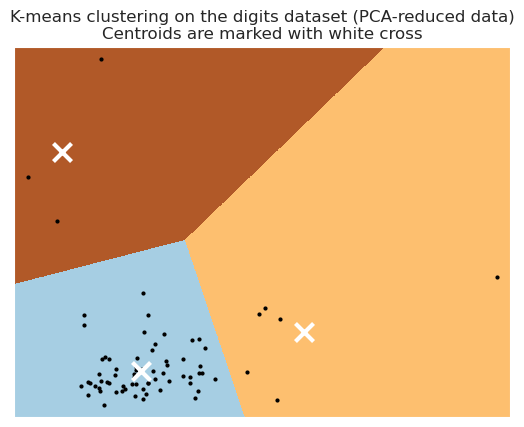

In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init="k-means++", n_clusters=3, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.01  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=4)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()